<a href="https://colab.research.google.com/github/viswamsarabu/UTAustin/blob/main/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
print("There are", df.shape[0], "rows and ", df.shape[1], "columns in the dataset" )


There are 1898 rows and  9 columns in the dataset


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
# isnull() can be used to find out missing values
missing_values = df.isnull().sum()
print("missing values per column", missing_values)

missing values per column order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# Write your code here
# describe method can be used to get the stats and transpose the outout for better visualization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# Write the code here
# Orders that dont have the ratings have the value of 'Not given'
orders_without_rating = (df['rating'] == 'Not given').sum()
print('No of orders without any rating : ')
print(orders_without_rating)

No of orders without any rating : 
736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

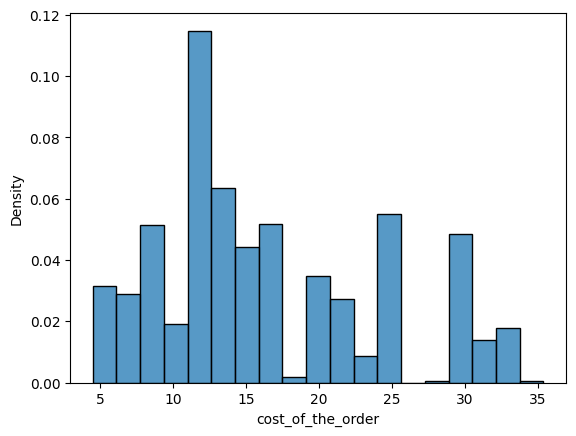

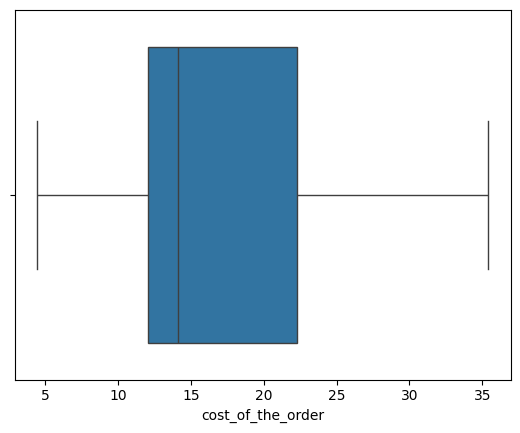

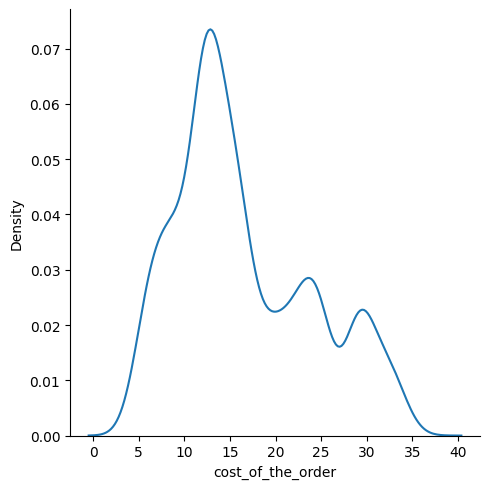

In [13]:
# Write the code here

# do a histplot on Cost of the Orders data to visualize the ditribution
sns.histplot(data=df,x='cost_of_the_order',stat='density')
plt.show()

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

sns.displot(data=df,x='cost_of_the_order',kind='kde')
plt.show()

#sns.countplot(data=df,x='rating',hue='cuisine_type')
#plt.show()

# do a histplot on Ratings column to visualize the ditribution of Order Ratings
#sns.histplot(data=df,x='rating')
#plt.show()
# do a histplot on day_of_the_week column to visualize the ditribution of Orders that were placed on Weekdays & Weekends
#sns.histplot(data=df,x='day_of_the_week')
#plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [14]:
# Write the code here
# use the value_counts()function to get unique restaurant names along with the counts
restaurant_counts = df['restaurant_name'].value_counts()
top_5_restaurants = restaurant_counts.head(5)
print("Top 5 restaurants in terms of the number of orders received:")
print(top_5_restaurants)

Top 5 restaurants in terms of the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [15]:
# Write the code here
# first get the number of orders placed on weekend
weekend_orders = df[df['day_of_the_week'].isin(['Weekend'])]
# now, get the number of orders placed on weekend for each cuisine type
cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# get the most popular cuisine by getting the index label of the maximum value
most_popular_cuisine = cuisine_counts.idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine)

The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [16]:
# Write the code here

# get the count of all orders with cost more than $20
orders_over_20 = (df['cost_of_the_order'] > 20).sum()
total_orders = len(df)
# now, calculate the percentage
pct_over_20 = orders_over_20/total_orders * 100
print("percentage of the orders cost more than 20 dollars : ", format(pct_over_20))

percentage of the orders cost more than 20 dollars :  29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [17]:
# Write the code here
# use mean function
mean_delivery_time = df['delivery_time'].mean()
print('Mean order delivery time: ', mean_delivery_time)

Mean order delivery time:  24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [18]:
# Write the code here
# get the number of orders placed by each customer using the value_counts() function
customer_orders = df['customer_id'].value_counts()

# now, simply use the head function to get the top 3 customers
top_3_customers = customer_orders.head(3)
print("Top 3 Customers and Number of Orders:")
print(top_3_customers)


Top 3 Customers and Number of Orders:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


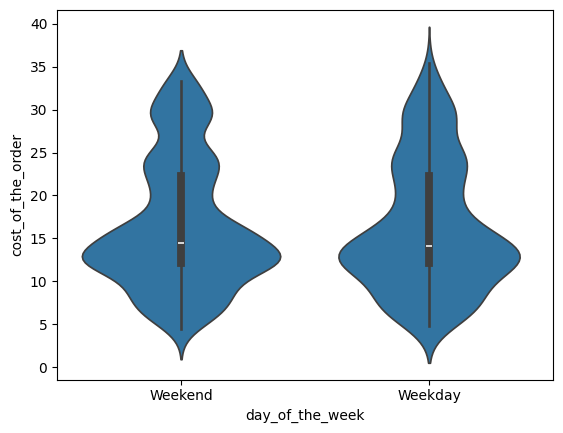

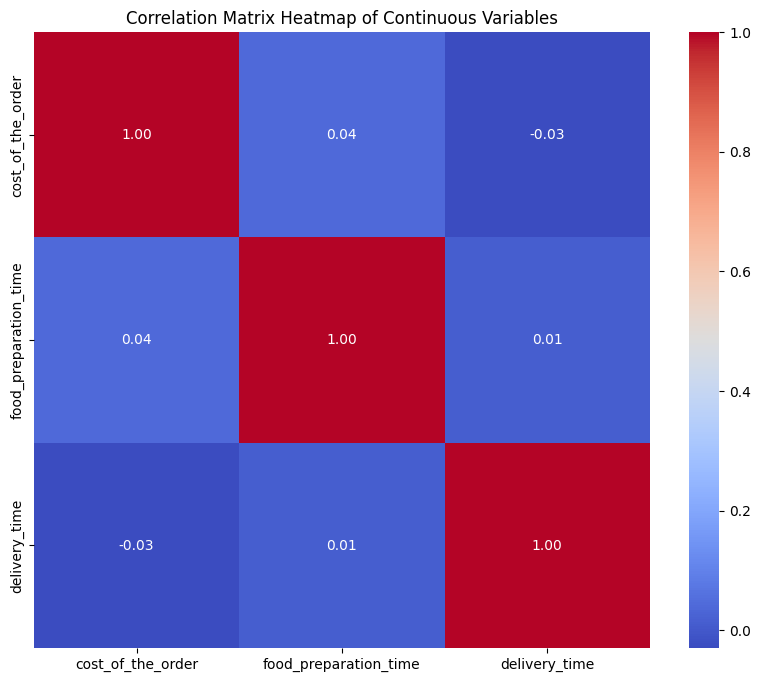

In [23]:
# Write the code here

# plot a scatterplot to get a correlation between cuisine_type and the food preparation time
#plt.figure(figsize=(15,7))
#sns.scatterplot(data=df, x='cuisine_type', y ='food_preparation_time')
#plt.show()

#sns.scatterplot(data=df, x='cost_of_the_order', y ='delivery_time')

#sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
#sns.boxplot(x='cuisine_type', y='day_of_the_week', data=df)

#sns.barplot(x='cuisine_type', y='food_preparation_time', data=df)
#sns.barplot(x='cuisine_type', y='cost_of_the_order', data=df)
#sns.barplot(x='cuisine_type', y='rating', data=df)
#plt.xticks(rotation=90)
#plt.show()

sns.violinplot(x="day_of_the_week", y="cost_of_the_order", data=df)


# plot a heatmap to get a correlation of different variables, in this case, to see how the cost_of_the_order is factoring with food_preparation_time and the delivery_time
continuous_vars = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]
corr_matrix = continuous_vars.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap of Continuous Variables')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [24]:
# Write the code here

# create a copy of foodhub dataframe and drop the orders where there is no Rating data
df_copy = df.copy()
df_copy = df[df['rating'] != 'Not given']
df_copy.head()
print("There are", df_copy.shape[0], "rows and ", df_copy.shape[1], "columns")

# perform a group by on restaurant_name and rating to get the count and mean
restaurant_ratings = df_copy.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
# now, filer the restaurants that have more than 50 ratings and rating of more than 4
target_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
target_restaurants_list = target_restaurants.index.tolist()

print("Restaurants that will get the promotion offer are :")
print(target_restaurants_list)

There are 1162 rows and  9 columns
Restaurants that will get the promotion offer are :
['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [25]:
# Write the code here

# create a new column 'charges' that will help with calculating net revenue
df['charges'] = 0

# calculate the charges on the orders that cost > $20
df.loc[df['cost_of_the_order'] > 20, 'charges'] = df['cost_of_the_order'] * 0.25

# calculate the charges on the orders that cost > $5
df.loc[(df['cost_of_the_order'] > 5) & (df['charges'] == 0), 'charges'] = df['cost_of_the_order'] * 0.15

# now, get the total revenue
total_revenue = df['cost_of_the_order'].sum()

# now, get the total charges
total_charges = df['charges'].sum()

# calculate net revenue
net_revenue = total_revenue - total_charges

print("Net revenue generated by the company across all orders: ${:.2f}".format(net_revenue))


Net revenue generated by the company across all orders: $25148.52


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [27]:
# Write the code here

# Calculate total time for each order (food preparation time + delivery time)
df['total_delivery_time'] = df['delivery_time'] + df['food_preparation_time']

# Calculate the percentage of orders that take more than 60 minutes to deliver
percentage_above_60 = (df['total_delivery_time'] > 60).mean() * 100

print("Percentage of orders taking more than 60 minutes to deliver: {:.2f}%".format(percentage_above_60))


Percentage of orders taking more than 60 minutes to deliver: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [26]:
# Write the code here
# get the average delivery time on weekdays and weekends using the day_of_the_week data point
weekday_mean_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print('weekday_mean_delivery_time : ', weekday_mean_delivery_time)
print('weekend_mean_delivery_time : ', weekend_mean_delivery_time)


weekday_mean_delivery_time :  28.340036563071298
weekend_mean_delivery_time :  22.4700222057735


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most popular restaurants for customers are

  1.   Blue Ribbon Fried Chicken
  2.   Blue Ribbon Sushi
  3.   Shake Shack
  4.   The Meatball Shop
   
*  Most popular cuisines for customers are
  1.   American
  2.   Japanese
  3.   Italian
  4.   Chinese
  5.   Mexican

*  Most popular cuisine on the weekend is American

*  Based on the heatmap, there is very little correlation between cost of the
   order and the delivery time.

*  Delivery time is longer on weekdays compared to weekends.  

*  Only 10% of the orders are taking more than 1 hour to deliver.  

*  Average delivery time is 24 minutes.



### Recommendations:

*  Few customers placed orders way more than others, so, identify those
   customers, plan for loyalty programs and promotions.

*  Delivery times can be improved on weekdays.

*  There are 736 orders (almost 40% of the entire orders) with no customer
   rating. Encourage customers to provide the ratings with some discount coupons and ease of use to provide the ratings.

*  Consider adding more Cuisine Types.

*  Invest in technology to come up with personalized recommendations,  
   promotions based on the order history & customer preferences

*  Do more analysis on why 10% of the orders are taking more than 60 minutes to
   deliver and come up with ideas to shorten the delivery time.

---